In [1]:
# Get the truth
## 1. Load the xi_Grid
import importlib
from gal_goku import plot
importlib.reload(plot)
data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
train_subdir = 'train_less_massive'

plot_xi_emu = plot.PlotXiEmu(data_dir=data_dir, train_subdir=train_subdir)

2025-09-03 14:43:19.275557: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-03 14:43:19.278930: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-03 14:43:19.288712: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756928599.304742 1923959 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756928599.309507 1923959 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1756928599.322784 1923959 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Using 10 cores for parallel processing


2025-09-03 14:43:22.881575: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-09-03 14:43:23.028414: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-09-03 14:43:23.159547: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-09-03 14:43:23.301931: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-09-03 14:43:23.491008: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-09-03 14:43:23.684635: E external/local_xla/xla/stream_executor/cuda/cuda_platfo

In [3]:
import numpy as np
# params of interest
indp = [0, 2, 3, 4]
dist = np.abs(plot_xi_emu.dist_planck)
print(dist.shape)
ind_sims = np.arange(dist.shape[0])
outlier_sims = []
for p in indp:
    percent = np.percentile(dist[:,p], [80])
    ind_above = np.where(dist[:,p] >= percent[0])
    print(f"Parameter {list(plot_xi_emu.latex_labels.keys())[p]}: {len(ind_above[0])} simulations above 80th percentile of {percent}, sims= {ind_above}")
    print(dist[ind_above, p])
    outlier_sims.extend(ind_above)
outlier_sims = np.unique(np.array(outlier_sims))
remaining_sims = np.setdiff1d(ind_sims, outlier_sims)
print(f"Total number of outlier simulations: {len(outlier_sims)}")
print(f"Remaining simulations after removing outliers: {len(remaining_sims)}")
print(f'outlier_sims: {outlier_sims}')


(36, 10)
Parameter omega0: 8 simulations above 80th percentile of [11.06071429], sims= (array([ 0,  5,  6, 11, 14, 17, 18, 20]),)
[[11.06071429 12.125      14.275      12.89642857 14.31071429 12.16785714
  15.94642857 11.69642857]]
Parameter hubble: 8 simulations above 80th percentile of [12.62563323], sims= (array([ 5,  7, 10, 16, 18, 19, 29, 32]),)
[[13.53968254 17.75555556 13.69206349 16.02857143 14.35238095 16.12380952
  14.22982101 12.62563323]]
Parameter scalar_amp: 8 simulations above 80th percentile of [18.12222222], sims= (array([ 0,  1,  5,  9, 10, 12, 16, 20]),)
[[29.52222222 35.01111111 18.94444444 28.36666667 18.12222222 25.5
  21.94444444 24.25555556]]
Parameter ns: 8 simulations above 80th percentile of [26.13157895], sims= (array([ 1,  2,  3,  6,  7, 13, 15, 20]),)
[[28.97368421 43.55263158 28.23684211 34.81578947 26.13157895 29.55263158
  42.60526316 36.18421053]]
Total number of outlier simulations: 21
Remaining simulations after removing outliers: 15
outlier_sims: [ 

(36, 26)
[(np.int64(2), np.str_('compressed_10p_Box1000_Part3000_0026')), (np.int64(18), np.str_('compressed_10p_Box1000_Part3000_0522')), (np.int64(20), np.str_('compressed_10p_Box1000_Part3000_0524'))]


Text(0.5, 1.0, "['omega0' 'hubble' 'scalar_amp' 'ns']")

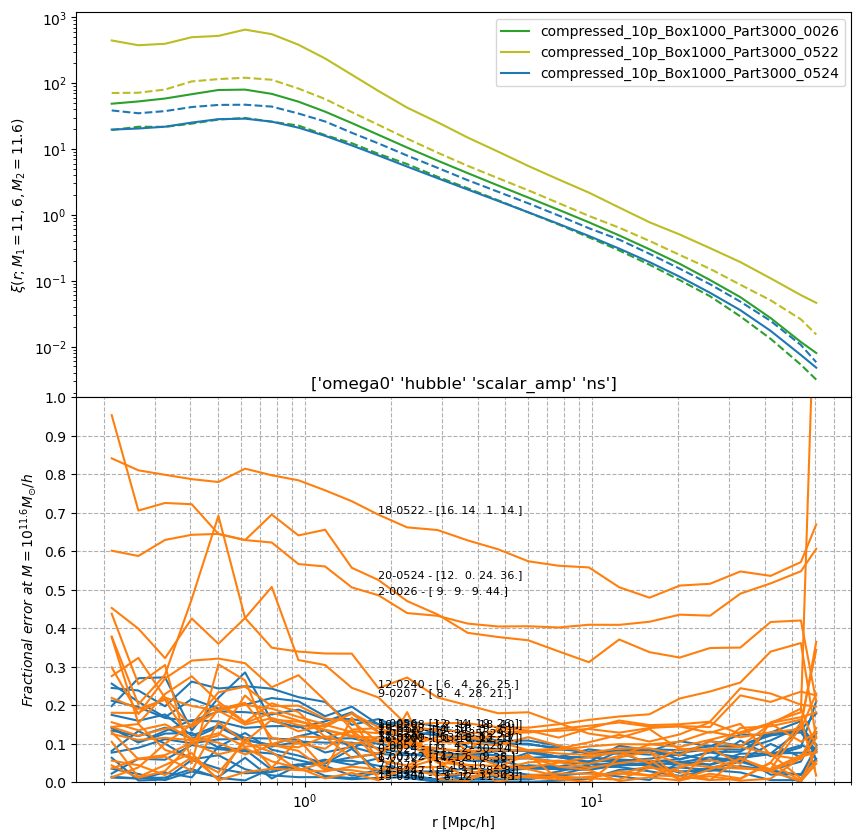

In [25]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True, sharey=False, gridspec_kw={'hspace': 0, 'height_ratios': [1, 1]})
mass_bins = np.unique(plot_xi_emu.emu.mbins[:,0])[::-1]

indm = 7
frac_errs = plot_xi_emu.frac_errs[:,indm, indm,:]
print(frac_errs.shape)


ind = np.where(np.all(frac_errs[:,0:-4] > 0.3, axis=1))[0]
print([(i, plot_xi_emu.sim_tags[i]) for i in ind])

for i in ind:
    ax[0].plot(plot_xi_emu.rbins, plot_xi_emu.truth[i,indm, indm,:], color=f'C{i}', alpha=1, label=plot_xi_emu.sim_tags[i])
    ax[0].plot(plot_xi_emu.rbins, plot_xi_emu.pred[i,indm, indm,:], color=f'C{i}', alpha=1, ls='--')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel(r'$\xi(r; M_1=11,6, M_2=11.6)$')
#ax[0].grid(which='both', linestyle='--', linewidth=0.8)
ax[0].legend(loc='upper right')


for i in remaining_sims:
    ax[1].plot(plot_xi_emu.rbins, frac_errs[i,:], color='C0', alpha=1)
for i in outlier_sims:
    ax[1].text(plot_xi_emu.rbins[10], frac_errs[i, 10], 
            f'{i}-{plot_xi_emu.sim_tags[i][-4::]} - {np.round(dist[i,indp])}', fontsize=8, verticalalignment='bottom')
    ax[1].plot(plot_xi_emu.rbins, frac_errs[i,:], color='C1', alpha=1)

#ax[1].set_title(f'Mass bin {mass_bins[indm]}')
ax[1].set_xscale('log')
ax[1].grid(which='both', linestyle='--', linewidth=0.8)
ax[1].set_ylim(0, 1)
ax[1].set_yticks(np.arange(0, 1.1, 0.1))
ax[1].legend(loc='upper left')
ax[1].set_ylabel(r'$Fractional \ error \ at  \ M = 10^{11.6} M_{\odot}/h$')
ax[1].set_xlabel('r [Mpc/h]')
ax[1].legend(frameon=False, loc='upper right')

ax[1].set_title(f'{np.array(list(plot_xi_emu.latex_labels.keys()))[indp]}')




In [9]:
for s in ind:
    for p in indp:
        percent = np.percentile(dist[:,p], [80, 85, 90, 95, 98, 100])
        print(f'{list(plot_xi_emu.latex_labels.keys())[p]}: ', percent[-1], dist[s,p])



omega0:  15.94642857142857 9.08214285714287
hubble:  17.755555555555567 8.758730158730177
scalar_amp:  35.01111111111111 8.788888888888856
ns:  43.55263157894736 43.55263157894736
omega0:  15.94642857142857 15.94642857142857
hubble:  17.755555555555567 14.352380952380953
scalar_amp:  35.01111111111111 0.6111111111111194
ns:  43.55263157894736 13.815789473684237
omega0:  15.94642857142857 11.696428571428582
hubble:  17.755555555555567 0.28253968253968315
scalar_amp:  35.01111111111111 24.25555555555553
ns:  43.55263157894736 36.18421052631578


## Removing the bad sims:

`XiNativeBinsFullDimReduc` now takes a list of sims to remove for LOOCV. I removed `[26, 522, 524]`:

NOTE: This is the result for only 20/33 sims, the rest is running

In [1]:
# Get the truth
## 1. Load the xi_Grid
import importlib
from gal_goku import plot
importlib.reload(plot)
data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
train_subdir = 'train_remove_bad_sims'

remove_sims = [26, 522, 524]
plot_xi_emu = plot.PlotXiEmu(data_dir=data_dir, train_subdir=train_subdir, remove_sims=remove_sims)

2025-08-26 20:38:29.945471: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-26 20:38:29.948979: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-26 20:38:29.959357: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756258709.977437 1704311 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756258709.982665 1704311 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1756258709.996217 1704311 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Using 10 cores for parallel processing


2025-08-26 20:38:33.582772: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-08-26 20:38:33.724701: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-08-26 20:38:33.871863: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-08-26 20:38:34.024624: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-08-26 20:38:34.196474: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-08-26 20:38:34.518091: E external/local_xla/xla/stream_executor/cuda/cuda_platfo

In [2]:
import numpy as np
# params of interest
indp = [0, 2, 3, 4]
dist = np.abs(plot_xi_emu.dist_planck)
print(dist.shape)
ind_sims = np.arange(dist.shape[0])
outlier_sims = []
for p in indp:
    percent = np.percentile(dist[:,p], [80])
    ind_above = np.where(dist[:,p] >= percent[0])
    print(f"Parameter {list(plot_xi_emu.latex_labels.keys())[p]}: {len(ind_above[0])} simulations above 80th percentile of {percent}, sims= {ind_above}")
    print(dist[ind_above, p])
    outlier_sims.extend(ind_above)
outlier_sims = np.unique(np.array(outlier_sims))
remaining_sims = np.setdiff1d(ind_sims, outlier_sims)
print(f"Total number of outlier simulations: {len(outlier_sims)}")
print(f"Remaining simulations after removing outliers: {len(remaining_sims)}")
print(f'outlier_sims: {outlier_sims}')


(33, 10)
Parameter omega0: 7 simulations above 80th percentile of [9.88516717], sims= (array([ 0,  4,  5,  7, 10, 13, 16]),)
[[11.06071429 12.125      14.275      10.49642857 12.89642857 14.31071429
  12.16785714]]
Parameter hubble: 7 simulations above 80th percentile of [12.33855454], sims= (array([ 4,  6,  9, 15, 17, 26, 29]),)
[[13.53968254 17.75555556 13.69206349 16.02857143 16.12380952 14.22982101
  12.62563323]]
Parameter scalar_amp: 7 simulations above 80th percentile of [18.08666667], sims= (array([ 0,  1,  4,  8,  9, 11, 15]),)
[[29.52222222 35.01111111 18.94444444 28.36666667 18.12222222 25.5
  21.94444444]]
Parameter ns: 7 simulations above 80th percentile of [25.57368421], sims= (array([ 1,  2,  4,  5,  6, 12, 14]),)
[[28.97368421 28.23684211 25.76315789 34.81578947 26.13157895 29.55263158
  42.60526316]]
Total number of outlier simulations: 19
Remaining simulations after removing outliers: 14
outlier_sims: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 26 29]


(33, 26)
[(np.int64(8), np.str_('compressed_10p_Box1000_Part3000_0207')), (np.int64(11), np.str_('compressed_10p_Box1000_Part3000_0240'))]


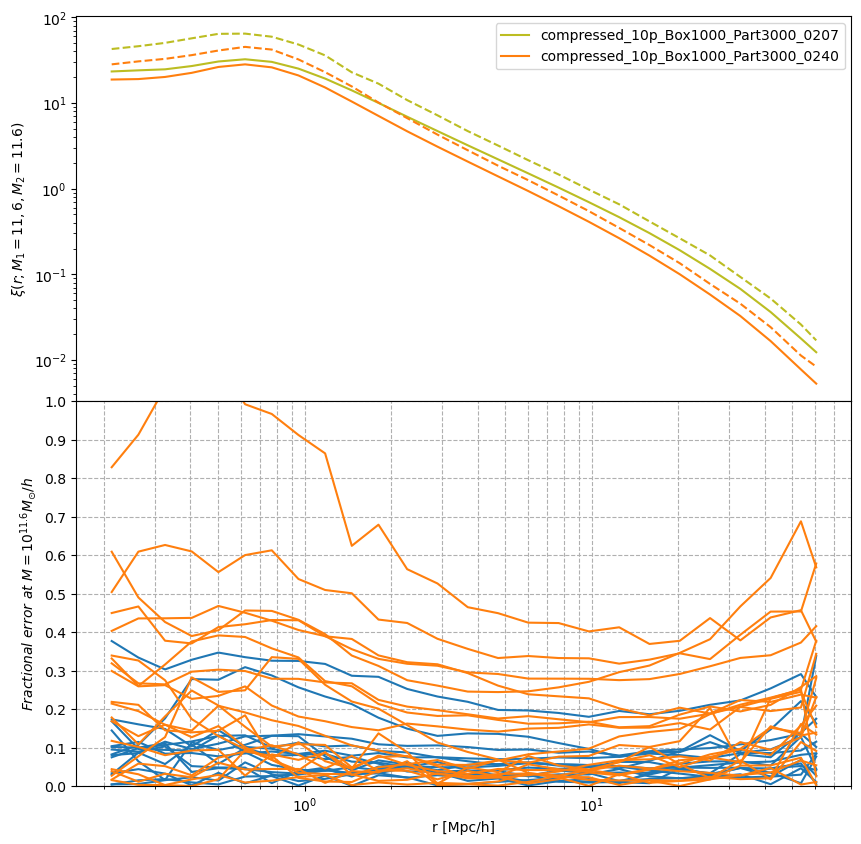

In [15]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True, sharey=False, gridspec_kw={'hspace': 0, 'height_ratios': [1, 1]})
mass_bins = np.unique(plot_xi_emu.emu.mbins[:,0])[::-1]

indm = 7
frac_errs = plot_xi_emu.frac_errs[:,indm, indm,:]
print(frac_errs.shape)


ind = np.where(np.all(frac_errs[:,0:-4] > 0.3, axis=1))[0]
print([(i, plot_xi_emu.sim_tags[i]) for i in ind])

for i in ind:
    ax[0].plot(plot_xi_emu.rbins, plot_xi_emu.truth[i,indm, indm,:], color=f'C{i}', alpha=1, label=plot_xi_emu.sim_tags[i])
    ax[0].plot(plot_xi_emu.rbins, plot_xi_emu.pred[i,indm, indm,:], color=f'C{i}', alpha=1, ls='--')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel(r'$\xi(r; M_1=11,6, M_2=11.6)$')
#ax[0].grid(which='both', linestyle='--', linewidth=0.8)
ax[0].legend(loc='upper right')


for i in remaining_sims:
    ax[1].plot(plot_xi_emu.rbins, frac_errs[i,:], color='C0', alpha=1)
for i in outlier_sims:
    ax[1].plot(plot_xi_emu.rbins, frac_errs[i,:], color='C1', alpha=1)

#ax[1].plot(plot_xi_emu.rbins, np.median(frac_errs[remaining_sims,:], axis=0), color='g', alpha=0.5, lw=6)
#ax[1].plot(plot_xi_emu.rbins, np.median(frac_errs[outlier_sims,:], axis=0), color='r', alpha=0.5, lw=6)
#ax[1].set_title(f'Mass bin {mass_bins[indm]}')
ax[1].set_xscale('log')
ax[1].grid(which='both', linestyle='--', linewidth=0.8)
ax[1].set_ylim(0, 1)
ax[1].set_yticks(np.arange(0, 1.1, 0.1))
ax[1].legend(loc='upper left')
ax[1].set_ylabel(r'$Fractional \ error \ at  \ M = 10^{11.6} M_{\odot}/h$')
ax[1].set_xlabel('r [Mpc/h]')
ax[1].legend(frameon=False, loc='upper right')



